# Portfolio Optimization

“Modern Portfolio Theory (MPT), a hypothesis put forth by Harry Markowitz in his paper “Portfolio Selection,” (published in 1952 by the Journal of Finance) is an investment theory based on the idea that risk-averse investors can construct portfolios to optimize or maximize expected return based on a given level of market risk, emphasizing that risk is an inherent part of higher reward. It is one of the most important and influential economic theories dealing with finance and investment.

__Monte Carlo Simulation for Optimization Search__

We could randomly try to find the optimal portfolio balance using Monte Carlo simulation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [3]:
import datetime
import yfinance as yf

In [4]:
start=datetime.datetime(2019,7,1)
end=datetime.datetime(2021,2,1)
sbi = yf.download("SBIN.NS", start, end, group_by='ticker')

[*********************100%***********************]  1 of 1 completed


In [14]:
start=datetime.datetime(2019,7,1)
end=datetime.datetime(2021,2,1)
bbo = yf.download("BANKBARODA.NS", start, end, group_by='ticker')

[*********************100%***********************]  1 of 1 completed


In [6]:
start=datetime.datetime(2019,7,1)
end=datetime.datetime(2021,2,1)
bbn= yf.download("BANDHANBNK.NS", start, end, group_by='ticker')

[*********************100%***********************]  1 of 1 completed


In [7]:
start=datetime.datetime(2019,7,1)
end=datetime.datetime(2021,2,1)
ktk= yf.download("KOTAKBANK.NS", start, end, group_by='ticker')

[*********************100%***********************]  1 of 1 completed


In [15]:
stocks = pd.concat([sbi['Close'],bbo['Close'],bbn['Close'],ktk['Close']],axis=1)
stocks.columns = ['sbi','bbo','bbn','ktk']

In [16]:
stocks.head()

,sbi,bbo,bbn,ktk
Date,,,,
2019-07-01,361.549988,121.250000,545.500000,1481.199951
2019-07-02,364.500000,120.500000,559.349976,1471.500000
2019-07-03,366.149994,125.500000,555.400024,1475.000000
2019-07-04,367.399994,129.399994,559.299988,1497.800049
2019-07-05,370.649994,130.449997,547.549988,1517.199951


# Daily return

In [19]:
daily_ret=stocks.pct_change(1)
daily_ret.head()

,sbi,bbo,bbn,ktk
Date,,,,
2019-07-01,NaN,NaN,NaN,NaN
2019-07-02,0.008159,-0.006186,0.025390,-0.006549
2019-07-03,0.004527,0.041494,-0.007062,0.002379
2019-07-04,0.003414,0.031076,0.007022,0.015458
2019-07-05,0.008846,0.008114,-0.021008,0.012952


In [21]:
daily_ret2=stocks.pct_change(2)
daily_ret2.head()

,sbi,bbo,bbn,ktk
Date,,,,
2019-07-01,NaN,NaN,NaN,NaN
2019-07-02,NaN,NaN,NaN,NaN
2019-07-03,0.012723,0.035052,0.018149,-0.004186
2019-07-04,0.007956,0.073859,-0.000089,0.017873
2019-07-05,0.012290,0.039442,-0.014134,0.028610


In [22]:
mean_daily_ret = stocks.pct_change(1).mean()
mean_daily_ret.head()

sbi   -0.000222
bbo   -0.000969
bbn   -0.000419
ktk    0.000682
dtype: float64

In [23]:
stocks.pct_change(1).corr()

,sbi,bbo,bbn,ktk
sbi,1.000000,0.762113,0.448563,0.485527
bbo,0.762113,1.000000,0.330468,0.366900
bbn,0.448563,0.330468,1.000000,0.457907
ktk,0.485527,0.366900,0.457907,1.000000


# Simulating Thousands of Possible Allocations

In [26]:
stocks.sample(5)

,sbi,bbo,bbn,ktk
Date,,,,
2020-04-03,175.500000,48.700001,181.550003,1140.849976
2020-01-23,323.200012,94.900002,475.100006,1605.849976
2020-07-07,188.600006,50.799999,394.700012,1368.250000
2020-08-06,190.949997,46.250000,300.049988,1340.099976
2020-09-14,198.500000,46.150002,301.399994,1304.699951


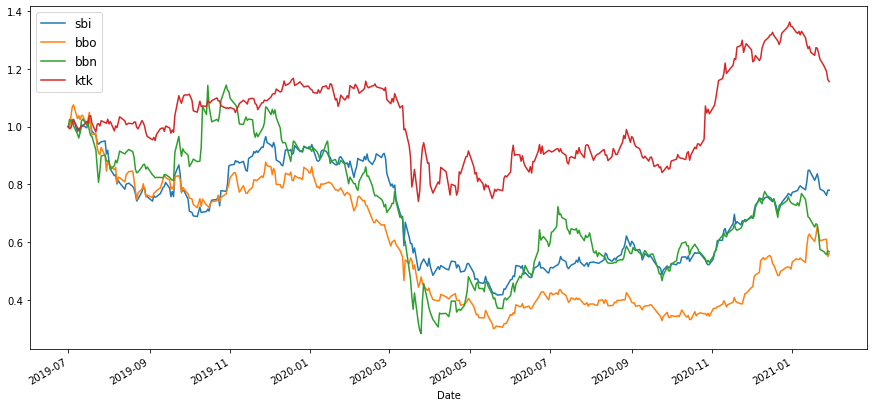

In [36]:
stock_normed = stocks/stocks.iloc[0]
stock_normed.plot(figsize=(15,7))
plt.legend(loc='upper left', prop={'size': 12});

# Log Returns vs Arithmetic Returns

We will now switch over to using log returns instead of arithmetic returns, for many of our use cases they are almost the same,but most technical analyses require detrending/normalizing the time series and using log returns is a nice way to do that. Log returns are convenient to work with in many of the algorithms we will encounter.<br>
For a full analysis of why we use log returns, check https://quantivity.wordpress.com/2011/02/21/why-log-returns/

In [38]:
log_ret = np.log(stocks/stocks.shift(1))
log_ret.head()

,sbi,bbo,bbn,ktk
Date,,,,
2019-07-01,NaN,NaN,NaN,NaN
2019-07-02,0.008126,-0.006205,0.025073,-0.006570
2019-07-03,0.004517,0.040656,-0.007087,0.002376
2019-07-04,0.003408,0.030603,0.006997,0.015339
2019-07-05,0.008807,0.008082,-0.021232,0.012869


In [41]:
log_ret.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sbi,391.0,-0.000635,0.028824,-0.144587,-0.014444,0.001466,0.015584,0.129525
bbo,391.0,-0.001477,0.031962,-0.161813,-0.018727,0.000528,0.016973,0.142865
bbn,391.0,-0.001450,0.045276,-0.287970,-0.021060,-0.002658,0.017324,0.331614
ktk,391.0,0.000372,0.024969,-0.139257,-0.011609,0.000717,0.012128,0.113784


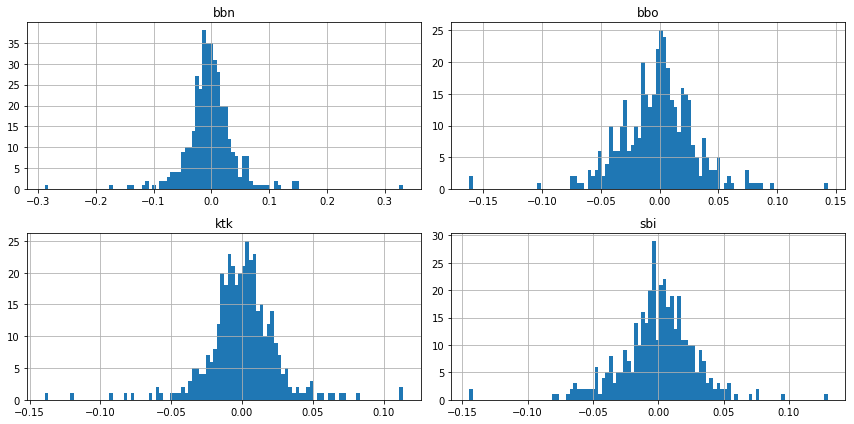

In [43]:
log_ret.hist(bins=100,figsize=(12,6));
plt.tight_layout()

In [45]:
log_ret.mean()*252 # multiply by number of annual trading days

sbi   -0.159926
bbo   -0.372272
bbn   -0.365372
ktk    0.093688
dtype: float64

In [46]:
# Compute pairwise covariance of columns
log_ret.cov()

,sbi,bbo,bbn,ktk
sbi,0.000831,0.000706,0.000622,0.000358
bbo,0.000706,0.001022,0.000522,0.000303
bbn,0.000622,0.000522,0.002050,0.000544
ktk,0.000358,0.000303,0.000544,0.000623


In [47]:
log_ret.cov()*252 # multiply by number of annual trading days

,sbi,bbo,bbn,ktk
sbi,0.209360,0.177809,0.156634,0.090189
bbo,0.177809,0.257438,0.131635,0.076379
bbn,0.156634,0.131635,0.516580,0.137032
ktk,0.090189,0.076379,0.137032,0.157107


# Single Run for Some Random Allocation

In [55]:
# Set seed (optional)
np.random.seed(101)

# Stock Columns
print('Stocks')
print(stocks.columns)
print('\n')

# Create Random Weights
print('Creating Random Weights')
weights = np.array(np.random.random(4))
print(weights)
print('\n')

# Rebalance Weights
print('Rebalance to sum to 1.0')
weights = weights / np.sum(weights)
print(weights)
print('\n')

# Expected Return
print('Expected Portfolio Return')
exp_ret = np.sum((log_ret.mean() * weights)*252)
print(exp_ret)
print('\n')

# Expected Variance
print('Expected Volatility')
exp_vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
print(exp_vol)
print('\n')

# Sharpe Ratio
SR = exp_ret/exp_vol
print('Sharpe Ratio')
print(SR)

Stocks
Index(['sbi', 'bbo', 'bbn', 'ktk'], dtype='object')


Creating Random Weights
[0.51639863 0.57066759 0.02847423 0.17152166]


Rebalance to sum to 1.0
[0.40122278 0.44338777 0.02212343 0.13326603]


Expected Portfolio Return
-0.2248243693850862


Expected Volatility
0.4188814623576625


Sharpe Ratio
-0.5367255168554573


In [56]:
num_ports = 20000

all_weights = np.zeros((num_ports,len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):

    # Create Random Weights
    weights = np.array(np.random.random(4))

    # Rebalance Weights
    weights = weights / np.sum(weights)
    
    # Save Weights
    all_weights[ind,:] = weights

    # Expected Return
    ret_arr[ind] = np.sum((log_ret.mean() * weights) *252)

    # Expected Variance
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))

    # Sharpe Ratio
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

In [57]:
sharpe_arr.max()

0.11974705286914604

In [58]:
aa = sharpe_arr.argmax()

In [59]:
all_weights[aa,:]

array([0.10665782, 0.0196591 , 0.02678289, 0.84690019])

In [60]:
max_sr_ret = ret_arr[aa]
max_sr_vol = vol_arr[aa]

# Plotting the data

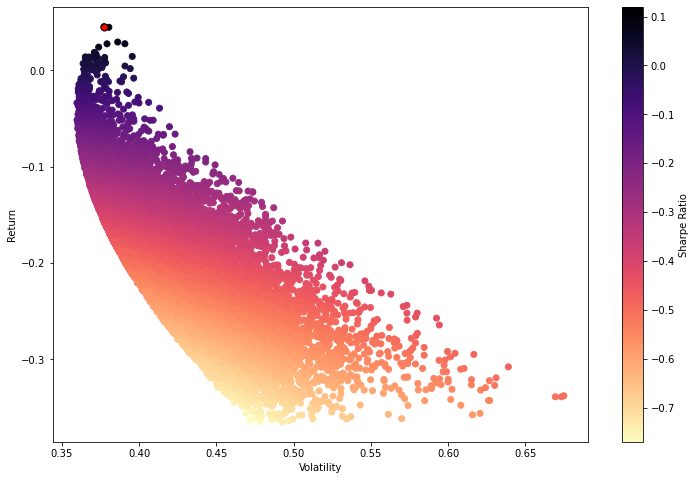

In [74]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='magma_r')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Add red dot for max SR
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black');

# Mathematical Optimization

There are much better ways to find good allocation weights than just guess and check. We can use optimization functions to find the ideal weights mathematically.

__Functionalize Return and SR operations__

In [75]:
def get_ret_vol_sr(weights):
    """
    Takes in weights, returns array or return,volatility, sharpe ratio
    """
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
    sr = ret/vol
    return np.array([ret,vol,sr])

In [76]:
from scipy.optimize import minimize

In [78]:
help(minimize)

Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.
    
    Parameters
    ----------
    fun : callable
        The objective function to be minimized.
    
            ``fun(x, *args) -> float``
    
        where ``x`` is an 1-D array with shape (n,) and ``args``
        is a tuple of the fixed parameters needed to completely
        specify the function.
    x0 : ndarray, shape (n,)
        Initial guess. Array of real elements of size (n,),
        where 'n' is the number of independent variables.
    args : tuple, optional
        Extra arguments passed to the objective function and its
        derivatives (`fun`, `jac` and `hess` functions).
    method : str or callable, optional
        Type of solver.  Should be one of
    
            - 'Nelder-Mead' :ref:`(see her

In [79]:
def neg_sharpe(weights):
    return  get_ret_vol_sr(weights)[2] * -1

In [80]:
# Contraints
def check_sum(weights):
    '''
    Returns 0 if sum of weights is 1.0
    '''
    return np.sum(weights) - 1

In [81]:
# By convention of minimize function it should be a function that returns zero for conditions
cons = ({'type':'eq','fun': check_sum})

In [82]:
# 0-1 bounds for each weight
bounds = ((0, 1), (0, 1), (0, 1), (0, 1))

In [83]:
# Initial Guess (equal distribution)
init_guess = [0.25,0.25,0.25,0.25]

__Optimization works as a minimization function, since we actually want to maximize the Sharpe Ratio, we will need to turn it negative so we can minimize the negative sharpe (same as maximizing the postive sharpe)__

In [84]:
# Sequential Least SQuares Programming (SLSQP).
opt_results = minimize(neg_sharpe,init_guess,method='SLSQP',bounds=bounds,constraints=cons)

In [85]:
opt_results

     fun: -0.2363656162149758
     jac: array([5.39167095e-01, 1.05411994e+00, 1.12796401e+00, 1.86264515e-09])
 message: 'Optimization terminated successfully'
    nfev: 15
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([0.00000000e+00, 2.22044605e-15, 3.60822483e-15, 1.00000000e+00])

In [86]:
opt_results.x

array([0.00000000e+00, 2.22044605e-15, 3.60822483e-15, 1.00000000e+00])

In [87]:
get_ret_vol_sr(opt_results.x)

array([0.09368758, 0.39636723, 0.23636562])

<br>

# All Optimal Portfolios (Efficient Frontier)

The efficient frontier is the set of optimal portfolios that offers the highest expected return for a defined level of risk or the lowest risk for a given level of expected return. Portfolios that lie below the efficient frontier are sub-optimal, because they do not provide enough return for the level of risk. Portfolios that cluster to the right of the efficient frontier are also sub-optimal, because they have a higher level of risk for the defined rate of return.<br>

Efficient Frontier http://www.investopedia.com/terms/e/efficientfrontier

In [88]:
# Our returns go from 0 to somewhere along 0.4
# Create a linspace number of points to calculate x on
frontier_y = np.linspace(0,0.4,100) # Change 100 to a lower number for slower computers!

In [89]:
def minimize_volatility(weights):
    return  get_ret_vol_sr(weights)[1]

In [91]:
frontier_volatility = []

for possible_return in frontier_y:
    # function for return
    cons = ({'type':'eq','fun': check_sum},
            {'type':'eq','fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})
    
    result = minimize(minimize_volatility,init_guess,method='SLSQP',bounds=bounds,constraints=cons)  #and here we have two constraints.
    
    frontier_volatility.append(result['fun'])

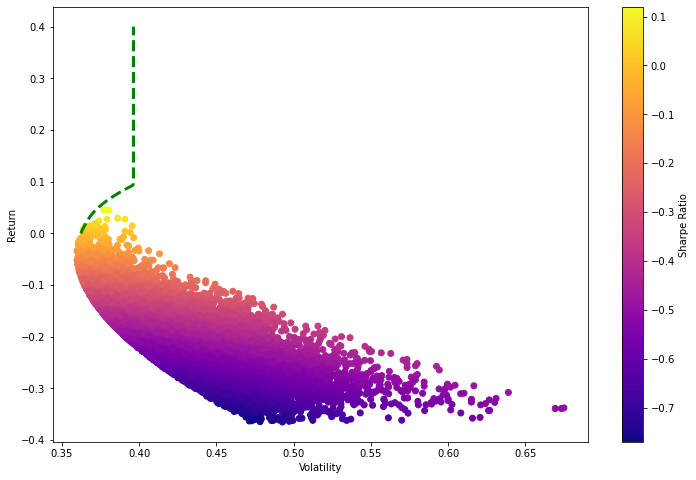

In [92]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Add frontier line
plt.plot(frontier_volatility,frontier_y,'g--',linewidth=3)